In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
# Data
X = torch.tensor([-1,0.3,2])
y = torch.tensor([-0.1,0.5,0.5])[None,:]
#{(−1, −0.1), (0.3, 0.5), (2, 0.5)} 

# insert 1 for the bias
X = torch.stack((torch.ones(size = (3,) ),X))
# initialize weights
w = torch.tensor([-0.45, 0.2])[:,None]



# Normal Batch Gradient Descent

Error at Epoch 0: 0.23284997045993805
Error at Epoch 1: 0.14446280896663666
Error at Epoch 2: 0.09676901251077652
Error at Epoch 3: 0.06870503723621368
Error at Epoch 4: 0.0510203093290329
Error at Epoch 5: 0.03933573514223099
Error at Epoch 6: 0.031382761895656586
Error at Epoch 7: 0.02587401121854782
Error at Epoch 8: 0.02202014811336994
Error at Epoch 9: 0.019309068098664284
Error at Epoch 10: 0.01739611104130745
Error at Epoch 11: 0.016044067218899727
Error at Epoch 12: 0.0150876110419631
Error at Epoch 13: 0.014410664327442646
Error at Epoch 14: 0.013931423425674438
Error at Epoch 15: 0.013592095114290714
Error at Epoch 16: 0.01335181575268507
Error at Epoch 17: 0.013181663118302822
Error at Epoch 18: 0.013061168603599072
Error at Epoch 19: 0.012975840829312801
Error at Epoch 20: 0.0129154147580266
Error at Epoch 21: 0.012872620485723019
Error at Epoch 22: 0.012842316180467606
Error at Epoch 23: 0.012820854783058167
Error at Epoch 24: 0.012805658392608166
Error at Epoch 25: 0.0127

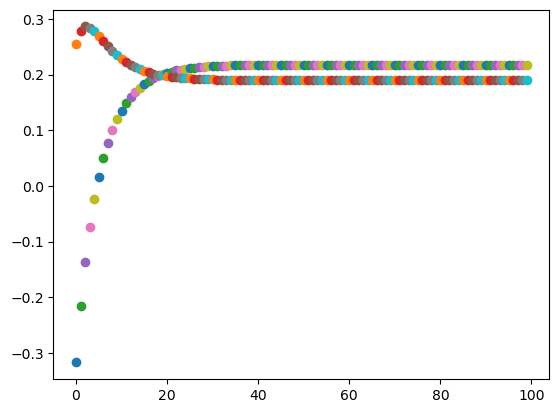

In [7]:
%matplotlib inline
#plt.xlim(-0.6,0.4)
#plt.ylim(0,0.5)

delta = 0.2
p = 3
#d_w_t = -delta * (1/p * X@X.T@w - 1/p * X@y.T)
w = torch.tensor([-0.45, 0.2])[:,None]
w.requires_grad_(True)


for epoch in range(100):
    
    if w.grad is not None:
        w.grad.zero_()
        

    y_pred = X.T@w
    loss = ((torch.linalg.vector_norm((X.T@w - y.T), ord=2))**2) * 0.5 * 1/p
    print(f'Error at Epoch {epoch}: {loss}')
    #print(w)
    loss.backward()
    #print('before',w.grad)
    
    #print(w.grad)
    with torch.no_grad():
        w -= delta * w.grad
        
    #plt.scatter(w.detach()[0],w.detach()[1])
    plt.scatter(epoch,w.detach()[0])
    plt.scatter(epoch,w.detach()[1])

plt.show()



# Line Search Gradient Descent

Error at Epoch 0: 0.049866098910570145
Error at Epoch 1: 0.019021974876523018
Error at Epoch 2: 0.01382282841950655
Error at Epoch 3: 0.012946450151503086
Error at Epoch 4: 0.012798725627362728
Error at Epoch 5: 0.01277382392436266
Error at Epoch 6: 0.01276963111013174
Error at Epoch 7: 0.012768920511007309
Error at Epoch 8: 0.012768802233040333
Error at Epoch 9: 0.01276878360658884
Error at Epoch 10: 0.012768779881298542
Error at Epoch 11: 0.012768775224685669
Error at Epoch 12: 0.012768775224685669
Error at Epoch 13: 0.012768778018653393
Error at Epoch 14: 0.012768778018653393
Error at Epoch 15: 0.012768778018653393
Error at Epoch 16: 0.012768778018653393
Error at Epoch 17: 0.012768775224685669
Error at Epoch 18: 0.012768778018653393
Error at Epoch 19: 0.012768775224685669
Error at Epoch 20: nan
Error at Epoch 21: nan
Error at Epoch 22: nan
Error at Epoch 23: nan
Error at Epoch 24: nan
Error at Epoch 25: nan
Error at Epoch 26: nan
Error at Epoch 27: nan
Error at Epoch 28: nan
Error a

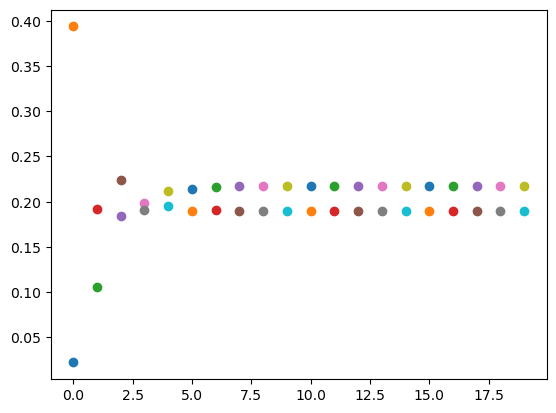

In [8]:
%matplotlib inline
#plt.xlim(-0.6,0.4)
#plt.ylim(0,0.5)

p = 3
w = torch.tensor([-0.45, 0.2])[:,None]


for epoch in range(100):
    g_t =  (1/p * X@X.T@w - 1/p * X@y.T)
            
    w -= ((g_t.T@g_t)/(g_t.T@(1/p * X@X.T)@g_t)) * g_t

    
    y_pred = X.T@w
    loss = ((torch.linalg.vector_norm((X.T@w - y.T), ord=2))**2) * 0.5 * 1/p
    print(f'Error at Epoch {epoch}: {loss}')

    
    #plt.scatter(w.detach()[0],w.detach()[1])
    plt.scatter(epoch,w[0])
    plt.scatter(epoch,w[1])

plt.show()



# Conjugate method

In [ ]:
# Unfinished
%matplotlib inline
#plt.xlim(-0.6,0.4)
#plt.ylim(0,0.5)

p = 3
w = torch.tensor([-0.45, 0.2])[:,None]


for epoch in range(100):
    g_t =  (1/p * X@X.T@w - 1/p * X@y.T)
    d_t = -g_t
    for i in range(10):
        H = (1/p * X@X.T)
        delta_t = -(d_t.T@g_t)/(d_t.T@H@d_t)
        w += delta*d_t
        g_t = H@w -1/p * X@y.T
        d += delta*d_t
            
    w -= ((g_t.T@g_t)/(g_t.T@H@g_t)) * g_t

    
    y_pred = X.T@w
    loss = ((torch.linalg.vector_norm((X.T@w - y.T), ord=2))**2) * 0.5 * 1/p
    print(f'Error at Epoch {epoch}: {loss}')

    
    #plt.scatter(w.detach()[0],w.detach()[1])
    plt.scatter(epoch,w[0])
    plt.scatter(epoch,w[1])

plt.show()

